In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
import numpy as np

In [59]:
data = pd.read_csv("data/train.csv")
data.drop(['Id'], axis=1,inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
features = data.drop('SalePrice',axis=1)
features.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [61]:
labels = data['SalePrice']
labels.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [62]:
#SaleCondition  = data['SaleCondition']
#SaleCondition.head()
#print(pd.get_dummies(SaleCondition))
#SaleCondition = pd.get_dummies(SaleCondition)

string_col = features.select_dtypes(include = 'object')
col_categorical = pd.get_dummies(string_col)
col_categorical.head()

col_string_name=string_col.columns.values.tolist()

for name in col_string_name:
    features = features.drop(name,axis=1)

features = pd.concat([features,col_categorical], axis=1)
features.fillna(features.mean(),inplace=True)
features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0
6,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,1,0,0,0,0,1,0
7,60,70.049958,10382,7,6,1973,1973,240.0,859,32,...,0,0,0,1,0,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851,0,...,0,0,0,1,0,0,0,0,1,0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [64]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8736397759380757
('Mean Absolute Error:', 18912.010628524633)
('Mean Squared Error:', 927659857.250774)
('Root Mean Squared Error:', 30457.509045402483)


In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.head(25)

,Actual,Predicted
892,154500,158006.995992
1105,325000,349866.386675
413,115000,92986.443381
522,159000,181809.569711
1036,315500,330926.230937
614,75500,73884.022194
218,311500,239181.329684
1160,146000,146322.929877
649,84500,65142.056197
887,135500,151229.384560


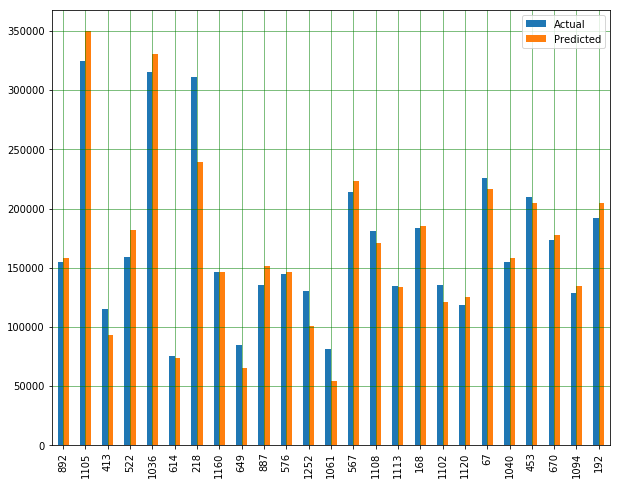

In [66]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

/home/juhi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



('Skewness is: ', 1.8828757597682129)
('kurtosis is: ', 6.536281860064529)


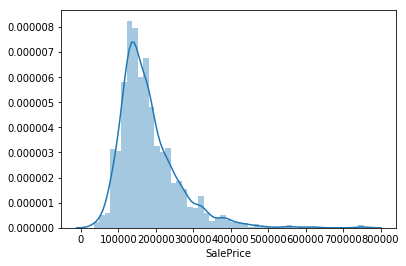

/home/juhi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



('Skewness is: ', 0.12134661989685333)
('kurtosis is: ', 0.809519155707878)


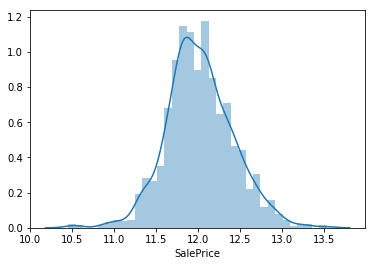

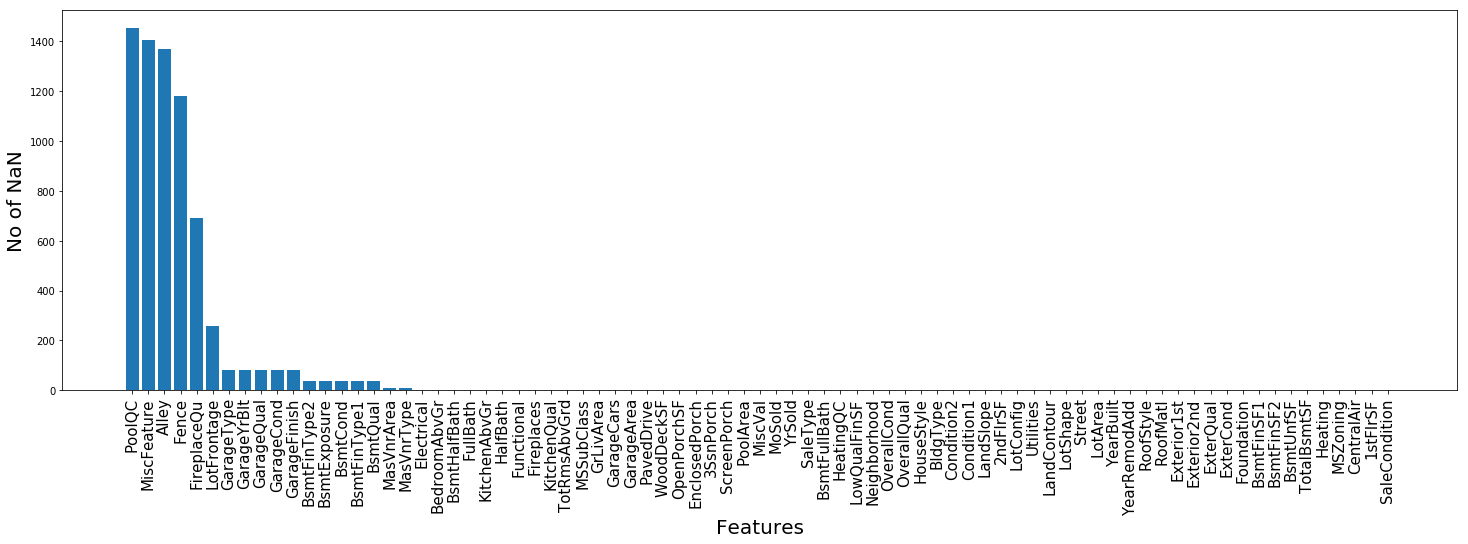

(1460, 79)
(1460, 74)


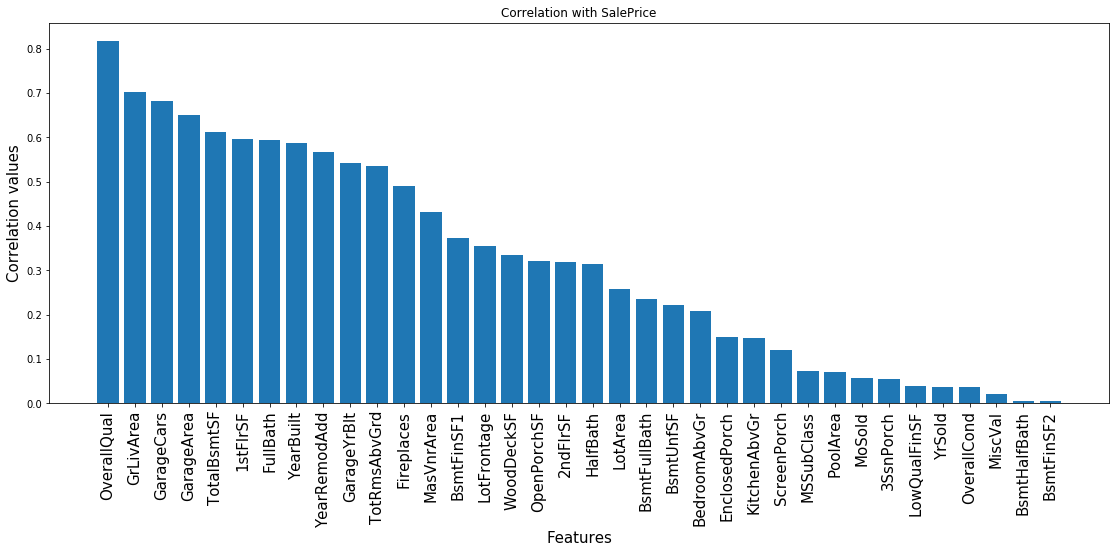

(1460, 75)
(1460, 67)


In [68]:
%run Data_exploration.ipynb

In [71]:
features,labels = data_preprocessed()

In [72]:
features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [73]:
labels.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=42)

In [75]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8992960890293049
('Mean Absolute Error:', 0.09117192416780188)
('Mean Squared Error:', 0.01708380840470601)
('Root Mean Squared Error:', 0.13070504353201529)


In [78]:
predicted = np.expm1(y_pred)
actual = np.expm1(y_test)
df = pd.DataFrame({'Actual': actual, 'Predicted': predicted})
df1 = df.head(25)
df1.head()

,Actual,Predicted
892,154500.0,152146.798942
1105,325000.0,343198.993018
413,115000.0,100928.510925
522,159000.0,175223.682015
1036,315500.0,316299.804518


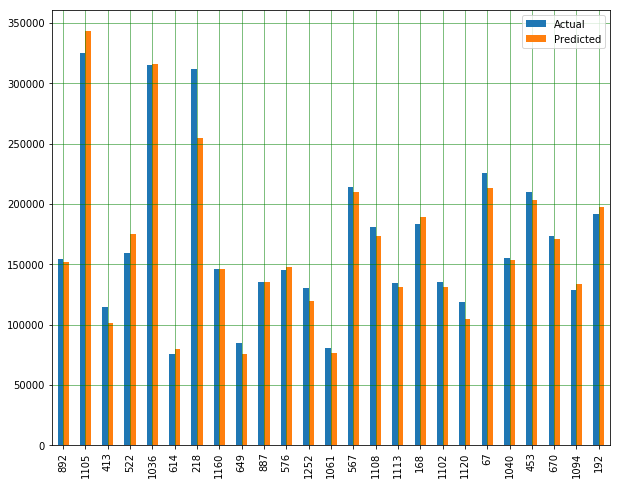

In [77]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()